# Άσκηση 4

Αρχικά θα χρησιμοποιήσουμε τις βιβλιοθήκες dplyr, rpart, ggplot2 και fpc οπότε τις εισαγάγουμε.

In [10]:
library('dplyr')
library('rpart')
library('ggplot2')
library('fpc')

Στη συνέχεια φορτώνουμε τα δεδομένα του decathlon από το αντίστοιχο αρχείο.

In [2]:
file_path<-'./decathlon.csv'
decathlon<-read.csv(file_path, sep = ';')
# head(decathlon)

## Ιεραρχική Συσταδοποίηση

Για την ιεραρχική συσταδοποίηση μας ενδιαφέρουν τα δεδομένα στις κολώνες 2 έως 11 του πίνακα. 

Τα τοποθετούμε στη μεταβλητή pmatrix

In [3]:
pmatrix<-decathlon[,2:11]

Mε την εντολή **dist()** θα υπολογίσουμε τον πίνακα αποστάσεων, χρησιμοποιώντας την ευκλείδια απόσταση (method="euclidean"). Σε αυτό το σημείο έχουμε τη δυνατότητα να επιλέξουμε και την απόσταση Manhattan. Στον πίνακα αποθηκεύονται οι αποστάσεις μεταξύ όλων των σημείων των δεδομένων.

In [4]:
# Πίνακας αποστάσεων
d<-dist(pmatrix, method="euclidean")

Χρησιμοποιούμε τη συνάρτηση hclust() η οποία δέχεται σαν παράμετρο έναν πίνακα αποστάσεων και μας επιστρέφει το δενδροδιάγραμμα των επιδόσεων των αθλητών.

Για τον τρόπο ορισμού ανάμεσα στις συστάδες θα χρησιμοποιήσουμε τη **Μέθοδο του Ward**. Σύμφωνα με αυτή τη μέθοδο κριτήριο για τη δημιουργία συστάδων είναι η μεγιστοποίηση της ομοιογένειας στο εσωτερικό των συστάδων. Το μέτρο που εφαρμόζεται είναι το άθροισμα του τετραγωνικού σφάλματος, και επιδίωξη της μεθόδου είναι η ελαχιστοποίηση του. Το ίδιο κριτήριο χρησιμοποιείται και από τον αλγόριθμο k-Means

Το τετραγωνικό σφάλμα δίνεται από τη σχέση

$ \sum \limits  (x - m)^2 $ 

όπου το x ανήκει σε μία κλάση C και m είναι το μέσο της.

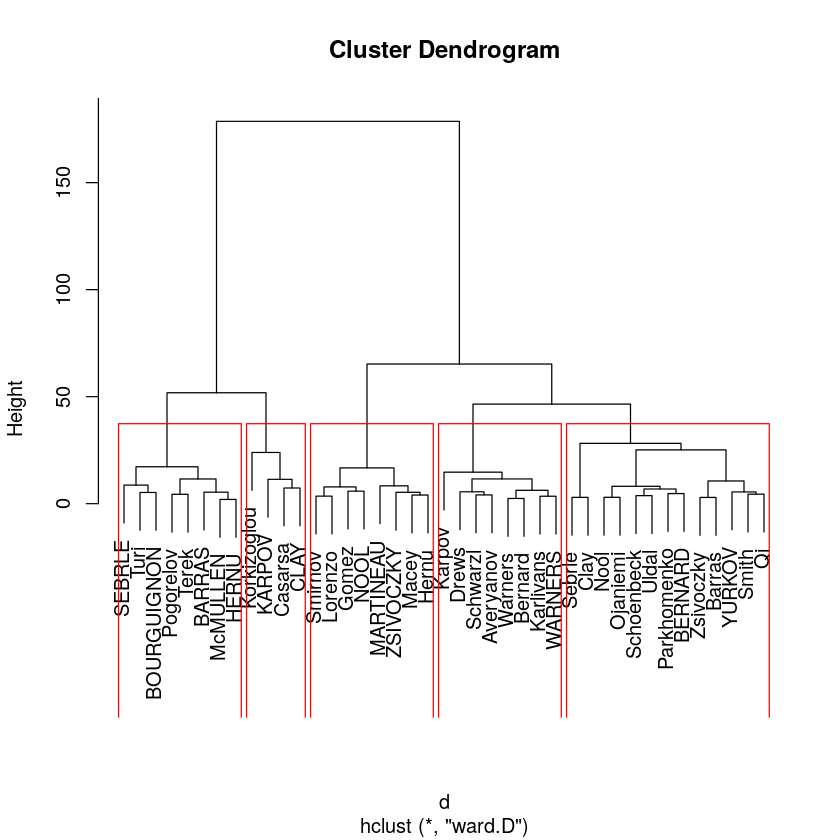

In [5]:
pfit<-hclust(d, method="ward.D")
plot(pfit, labels=decathlon$X, cex= 1.0)

rect.hclust(pfit, k=5)


Από το δενδροδιάγραμμα προκύπτει ο προτεινόμενος αριθμός των clusters και είναι ίσος με 5

Οπότε θα γίνει κλάδεμα του διαγράμματος χρησιμοποιώντας την εντολή cutree()

In [6]:
groups <- cutree(pfit, k=5)

Στη συνέχεια προσθέτουμε μία κολώνα με το όνομα Cluster στον πίνακα, όπου περιέχει τον cluster που ανήκει ο κάθε αθλητής και ταξινομούμε με αύξουσα σειρά τα δεδομένα

In [7]:
df<-mutate(decathlon, Cluster=groups)
df<-df[order(df$Cluster),]
df

,X,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.H,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition,Cluster
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
1,Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,1,8893,OlympicG,1
2,Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,2,8820,OlympicG,1
6,Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.70,63.45,269.54,6,8287,OlympicG,1
8,Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.40,61.33,276.33,8,8235,OlympicG,1
12,Schoenbeck,10.90,7.30,14.77,1.88,50.30,14.34,44.41,5.00,60.89,278.82,12,8077,OlympicG,1
13,Barras,11.14,6.99,14.91,1.94,49.41,14.37,44.83,4.60,64.55,267.09,13,8067,OlympicG,1
14,Smith,10.85,6.81,15.24,1.91,49.27,14.01,49.02,4.20,61.52,272.74,14,8023,OlympicG,1
16,Ojaniemi,10.68,7.50,14.97,1.94,49.12,15.01,40.35,4.60,59.26,275.71,16,8006,OlympicG,1
18,Qi,11.06,7.34,13.55,1.97,49.65,14.78,45.13,4.50,60.79,272.63,18,7934,OlympicG,1


## K-means

Στο δεύτερο μέρος της άσκησης ζητείται να γίνει συσταδοποίηση με τη μέθοδο K-means. 
Ο αλγόριθμος K-means είναι διαχωρίζει τα δεδομένα σε συστάδες και κάθε συστάδα συσχετίζεται με ένα κεντρικό σημείο (κεντροειδές-centroid). Κάθε σημείο τοποθετείται στη συστάδα με το κοντινότερο κεντρικό σημείο.
Ο αλγόριθμος δέχεται σαν είσοδο τον αριθμό των συστάδων.

Για τη συσταδοποίηση των δεδομένων decathlon με τον αλγόριθμο K-Means θα χρησιμοποιήσουμε τη συνάρτηση **kmeans()**. Στη συνάρτηση ορίζουμε τα δεδομένα, τον αριθμό των cluster και τον μέγιστο αριθμό των επαναλήψεων που θα πραγματοποιηθεί. Η συναρτηση χρησιμοποιεί την ευκλείδια απόσταση.

In [8]:
no_of_clusters <- 5
pclusters <- kmeans(decathlon[,2:11], no_of_clusters, nstart=100, iter.max=100)
pclusters

K-means clustering with 5 clusters of sizes 3, 10, 8, 10, 10

Cluster means:
     X100m Long.jump Shot.put High.jump    X400m  X110m.H   Discus Pole.vault
1 10.88000  7.256667 14.61333  1.946667 49.63333 14.36667 48.58000   4.846667
2 11.10800  7.153000 14.30000  1.982000 49.15300 14.70800 43.83400   4.606000
3 11.11375  7.136250 14.40625  1.986250 50.90000 14.84750 44.04375   4.847500
4 10.86600  7.457000 14.34000  1.978000 48.97200 14.35000 42.94400   4.754000
5 10.96300  7.270000 14.80700  1.972000 49.69200 14.63800 45.14800   4.834000
  Javeline   X1500m
1 54.50333 306.2333
2 58.93100 265.9190
3 56.68250 289.7150
4 54.79100 276.5740
5 63.67900 277.8670

Clustering vector:
 [1] 5 5 4 2 4 2 2 5 4 4 3 5 2 5 4 4 2 5 4 5 3 2 3 2 4 1 5 3 3 1 1 5 5 4 2 3 2 3
[39] 4 2 3

Within cluster sum of squares by cluster:
[1] 242.1775 299.2088 274.0792 261.7050 347.0710
 (between_SS / total_SS =  79.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.wit

Τα δεδομένα που προκύπτουν από την εφαρμογή της μεθόδου είναι το μέγεθος κάθε συστάδας, το κέντρο της(centroids), ένα διάνυσμα το οποίο περιέχει τον cluster που ανήκειη κάθε εγγραφή κ.ά.

In [9]:
pclusters$centers

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.H,Discus,Pole.vault,Javeline,X1500m
1,10.88000,7.256667,14.61333,1.946667,49.63333,14.36667,48.58000,4.846667,54.50333,306.2333
2,11.10800,7.153000,14.30000,1.982000,49.15300,14.70800,43.83400,4.606000,58.93100,265.9190
3,11.11375,7.136250,14.40625,1.986250,50.90000,14.84750,44.04375,4.847500,56.68250,289.7150
4,10.86600,7.457000,14.34000,1.978000,48.97200,14.35000,42.94400,4.754000,54.79100,276.5740
5,10.96300,7.270000,14.80700,1.972000,49.69200,14.63800,45.14800,4.834000,63.67900,277.8670
